In [ ]:
!pip list

In [2]:
import tensorflow as tf 
import os

In [3]:
os.path.join('data','happy')


'data\\happy'

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\djber\AppData\Local\Temp\ipykernel_19664\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data'

In [7]:
os.listdir(data_dir)

['happy', 'sad']

In [8]:
image_exts = ['jpeg','png','bmp','jpg']

In [13]:
#Remove weird files
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [14]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [17]:
import numpy as np 
from matplotlib import pyplot as plt

In [18]:

data = tf.keras.utils.image_dataset_from_directory('data')


Found 305 files belonging to 2 classes.


In [19]:
#Images represented as numpy arrays
data_iterator = data.as_numpy_iterator()

In [20]:
# Get another batch from the iterator
batch = data_iterator.next()
# 0 = happy
# 1 = sad

In [185]:
batch[1]

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1])

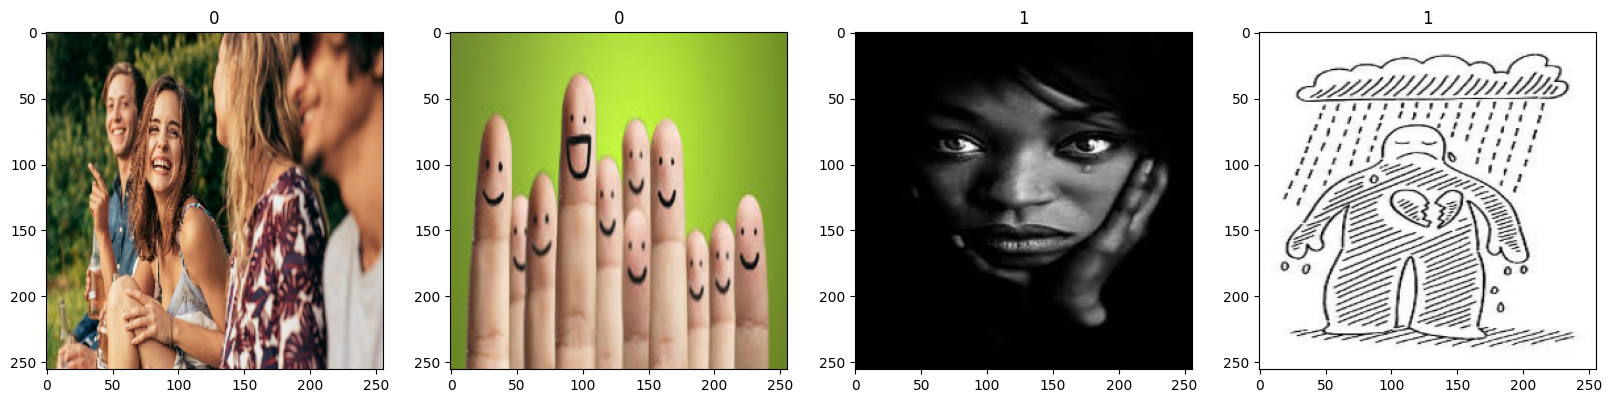

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
batch[0]

In [23]:
data = data.map(lambda x,y: (x/255, y))

In [29]:
scaled_iterator = data.as_numpy_iterator()

In [30]:
batch = scaled_iterator.next()


In [31]:
#data.as_numpy_iterator().next()

In [34]:
batch[0].max()

1.0

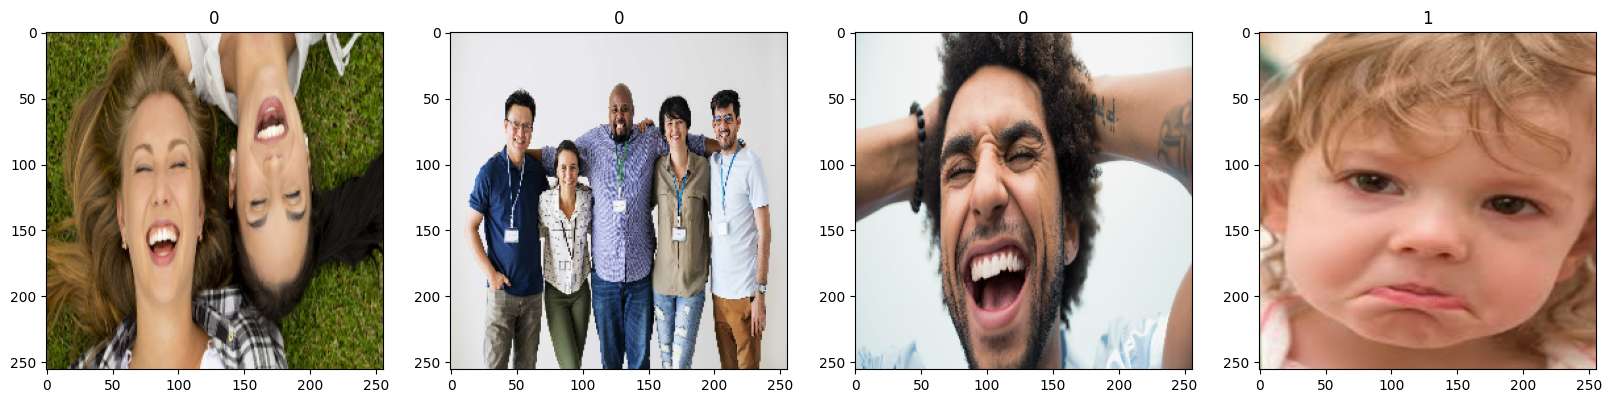

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [35]:
len(data)

10

In [36]:
train_size = int(len(data)*.7)
val_size = int(len(data) *.2)+1
test_size = int(len(data) *.1)+1

In [37]:
train_size +val_size+test_size

12

In [38]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\djber\ImageClassification\imageclassification\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
tf.optimizers

<KerasLazyLoader (keras_3) keras._tf_keras.keras.optimizers as optimizers mode=None>

In [43]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
logdir='logs'

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 708ms/step - accuracy: 0.5273 - loss: 0.8711 - val_accuracy: 0.7160 - val_loss: 0.5976
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 732ms/step - accuracy: 0.6807 - loss: 0.6040 - val_accuracy: 0.7901 - val_loss: 0.5115
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 638ms/step - accuracy: 0.7127 - loss: 0.5791 - val_accuracy: 0.6790 - val_loss: 0.5788
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 790ms/step - accuracy: 0.7685 - loss: 0.5082 - val_accuracy: 0.8395 - val_loss: 0.3724
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 703ms/step - accuracy: 0.8874 - loss: 0.4007 - val_accuracy: 0.8272 - val_loss: 0.3624
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 603ms/step - accuracy: 0.8506 - loss: 0.3783 - val_accuracy: 0.9506 - val_loss: 0.2938
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 648ms/step - accuracy: 0.9134 - loss: 0.2703 - val_accuracy: 0.9136 - val_loss: 0.2270
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 671ms/step - accuracy: 0.9286 - loss: 0.2394 - val_accuracy: 0.9383 - val_loss

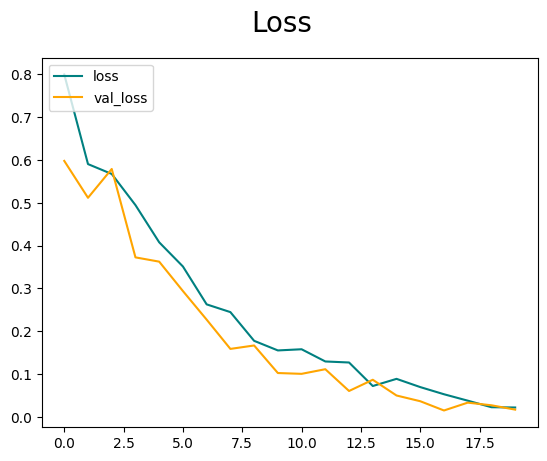

In [48]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

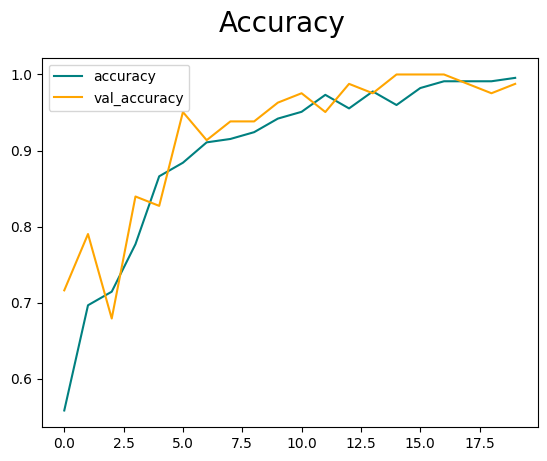

In [49]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [50]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [51]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [52]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    yhat = model.predict(X)



In [53]:


print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')




Precision: 0.0, Recall: 0.0, Accuracy: 0.0


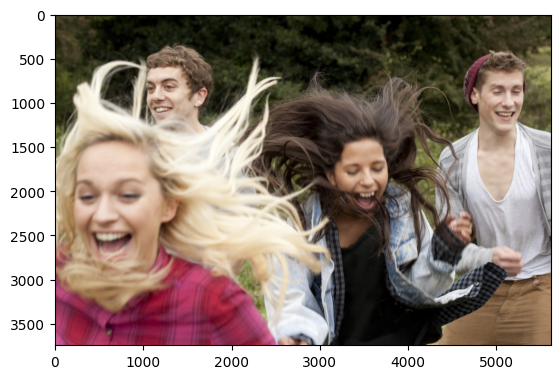

In [54]:
img = cv2.imread('154006829.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

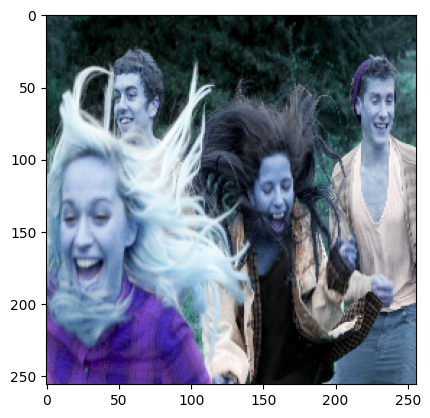

In [55]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [57]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


In [58]:
yhat

array([[0.2470366]], dtype=float32)

In [59]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
